# **COMPUTER VISION TECHNIQUES - part 2**
## By: Ayush Adarsh
### Notebook no. : 4


## **1. Canny Edge Detection**



**Used in Object Detection**: Identifying contours and shapes in an image.

### Mathematical Steps:

### Noise Reduction
The image is convolved with a Gaussian filter to reduce noise:


$I_{\text{smooth}}(x, y) = I(x, y) * G(x, y)$


where $ G(x, y) $ is the Gaussian kernel.

$
G(x, y) = \frac{1}{2\pi \sigma^2} \exp\left(-\frac{x^2 + y^2}{2 \sigma^2}\right)
$

Where $(x, y) $ are the coordinates of the kernel.

The "coordinates of the kernel" refer to how far an element in the kernel is from the center, expressed in terms of $x$ and $y$. The distance is found out using Gaussian Function.


for $sigma = 1$

$
G(x, y) =
\begin{bmatrix}
\frac{1}{16} & \frac{2}{16} & \frac{1}{16} \\
\frac{2}{16} & \frac{4}{16} & \frac{2}{16} \\
\frac{1}{16} & \frac{2}{16} & \frac{1}{16}
\end{bmatrix}
$

---

### Gradient Calculation
Compute intensity gradients using Sobel filters:

- $S_x$ : Sobel filter for detecting horizontal edges.
- $ S_y $: Sobel filter for detecting vertical edges.

The Sobel filter kernels are defined as:

$
S_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix},
\quad
S_y =
\begin{bmatrix}
-1 & -2 & -1 \\
 0 &  0 &  0 \\
 1 &  2 &  1
\end{bmatrix}
$

These filters are used to compute the gradient components in the horizontal $ G_x $ and vertical $G_y $ directions.


$G_x = I_{\text{smooth}} * S_x, \quad G_y = I_{\text{smooth}} * S_y$


where $ S_x $and $ S_y $ are the Sobel filters for horizontal and vertical edges.

---

### Gradient Magnitude

$ G = \sqrt{G_x^2 + G_y^2}$


---

### Gradient Direction
$\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)$

---

### Non-Maximum Suppression
Thin edges by retaining only local maxima in the direction of the gradient.

---

### Double Thresholding
Identify strong $T_{\text{high}} $ and weak $ T_{\text{low}} $ edges:

- Pixels above  $T_{\text{high}}$ are marked as strong edges.
- Pixels between $T_{\text{low}}$ and $T_{\text{high}} $are weak edges.

---

### Edge Tracking by Hysteresis
Link weak edges to strong edges if they are connected, discarding isolated weak edges.


In [ ]:
import cv2
import matplotlib.pyplot as plt

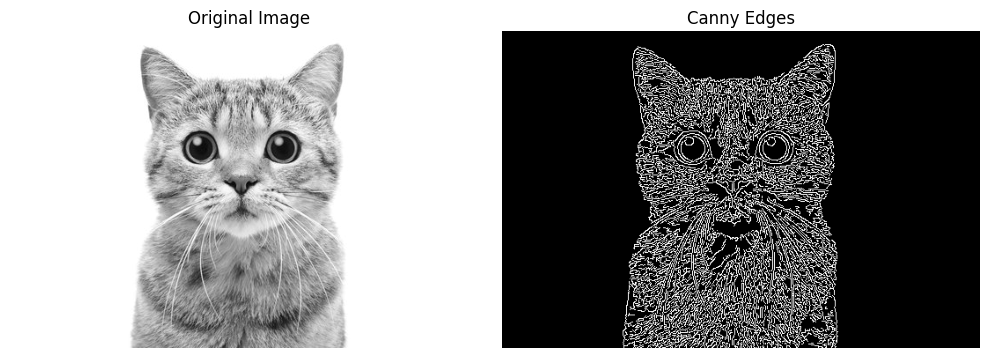

In [8]:
image = cv2.imread("Cat.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges_canny = cv2.Canny(image, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges_canny, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")
plt.tight_layout()
plt.show()


## **2. Laplacian of Gaussian (LoG) Edge Detection**
**Used in Texture Analysis:** Highlighting fine details in textures.

**Used in Image Segmentation:** Finding object boundaries for segmentation tasks

## Mathematical Steps:

### Noise Reduction
Convolve the image with a Gaussian kernel:

$
I_{\text{smooth}}(x, y) = I(x, y) * G(x, y)
$

---

### Second Derivative Calculation
Compute the Laplacian of the smoothed image:

$
\nabla^2 I_{\text{smooth}}(x, y)
$

#### Laplacian Kernel Example:
$
\text{Kernel} =
\begin{bmatrix}
  0 & -1 & 0 \\
 -1 &  4 & -1 \\
  0 & -1 & 0
\end{bmatrix}
$

---

### Zero-Crossing Detection
Identify points where the Laplacian changes sign (zero-crossings).
- It refers to points where the Laplacian value of the image changes sign, i.e., transitions from positive to negative or vice versa. **These points typically indicate edges or boundaries in the image.**


In [3]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian operator
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Convert to absolute values and normalize
laplacian = cv2.convertScaleAbs(laplacian)

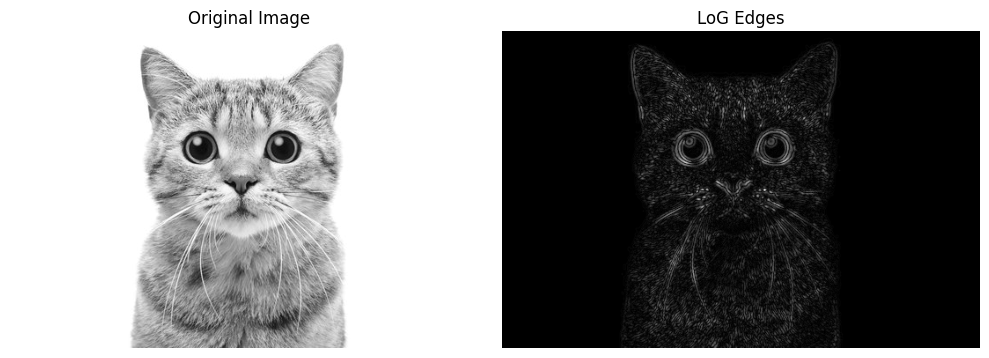

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap="gray")
plt.title("LoG Edges")
plt.axis("off")
plt.tight_layout()
plt.show()


## **3. Difference of Gaussian (DoG) Edge Detection**
**Used in Blob Detection:** Detecting circular or blob-like objects in images.

**Used in Feature Extraction:** Highlighting regions with strong intensity gradients.


## Mathematical Steps:

### Compute Two Gaussian Blurs
Create two blurred images with different standard deviations $ \sigma_1 $ and $ \sigma_2 $:

$ I_{\text{blur}_1} = I(x, y) * G_{\sigma_1}(x, y) $

$ I_{\text{blur}_2} = I(x, y) * G_{\sigma_2}(x, y) $

---

### Subtract the Two Blurred Images
Compute the difference of Gaussians (DoG):

$ \text{DoG}(x, y) = I_{\text{blur}_1} - I_{\text{blur}_2} $

---

### Thresholding
Threshold the DoG result to identify edges.


In [5]:
# Apply two Gaussian blurs with different sigma values
blur1 = cv2.GaussianBlur(image, (5, 5), 1) #sigma = 1
blur2 = cv2.GaussianBlur(image, (5, 5), 2) #sigma = 2

# Compute the Difference of Gaussians
dog = blur1 - blur2

# Normalize and threshold
dog = cv2.normalize(dog, None, 0, 255, cv2.NORM_MINMAX)
dog = cv2.convertScaleAbs(dog)

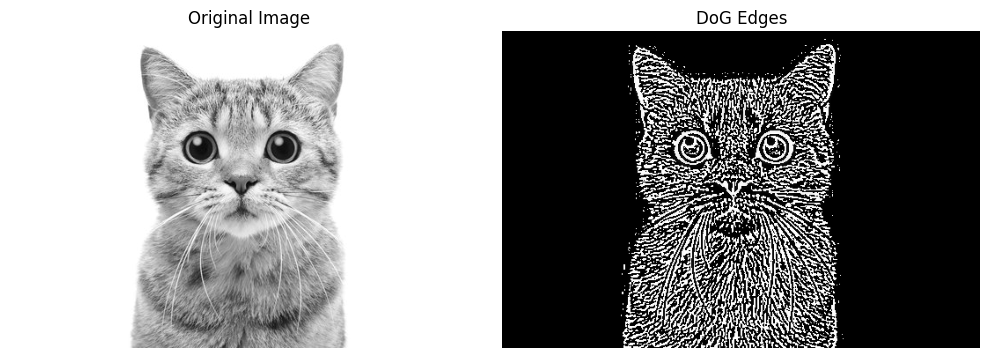

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dog, cmap="gray")
plt.title("DoG Edges")
plt.axis("off")
plt.tight_layout()
plt.show()


## **4. SIFT (Scale-Invariant Feature Transform)** for Corner Detection
*  Identifies keypoints in an image which remain unchanged to scaling, rotation, and partially invariant to affine transformations.





### Mathematical Formulation:

#### Scale-Space Representation:

SIFT begins by constructing a scale-space, where the image is convolved with Gaussian filters at multiple scales. The scale-space representation of an image is given by:

$$L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)$$

- $L(x, y, \sigma)$: The image at scale $\sigma$.
- $G(x, y, \sigma)$: Gaussian filter with standard deviation $\sigma$.
- $I(x, y)$: Original image.
- $*$: Convolution operation.

This process generates a series of blurred images at different scales.

#### Difference of Gaussian (DoG):

The next step is to identify keypoints in the scale-space by subtracting two consecutive blurred images (Gaussian filtered) to produce a Difference of Gaussian (DoG). The DoG is defined as:

$$D(x, y, \sigma) = L(x, y, k\sigma) - L(x, y, \sigma)$$

- $k$: A constant factor used to scale the image.
- $D(x, y, \sigma)$: Difference of Gaussian at scale $\sigma$.

#### Keypoint Localization:

Keypoints are detected by finding extrema (local minima or maxima) in the DoG images across scales. A 3D space is constructed for this purpose, where two spatial dimensions ($x$, $y$) and one scale dimension ($\sigma$) are considered.

#### Orientation Assignment:

For each detected keypoint, an orientation is assigned to make the keypoint invariant to rotation. The orientation is determined by computing the gradient of the image in the local neighborhood of the keypoint.

The gradient magnitude $m$ and orientation $\theta$ at each pixel are computed as:

$$m = \sqrt{(I_x)^2 + (I_y)^2}$$

$$\theta = \tan^{-1}\left(\frac{I_y}{I_x}\right)$$

- $I_x$, $I_y$: Gradients of the image in $x$ and $y$ directions.
- $m$: Gradient magnitude.
- $\theta$: Gradient orientation.

#### Descriptor Generation:

The final step involves constructing a descriptor for each keypoint. A 16x16 neighborhood around each keypoint is divided into 16 cells, and for each cell, a histogram of gradient orientations is created. The descriptor vector is formed by concatenating all the histograms from the cells.

The descriptor is rotation-invariant because the histograms are weighted by the dominant orientation of the keypoint.


In [9]:
# Create a SIFT detector object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints on the original image
output_image = cv2.drawKeypoints(image, keypoints, None)

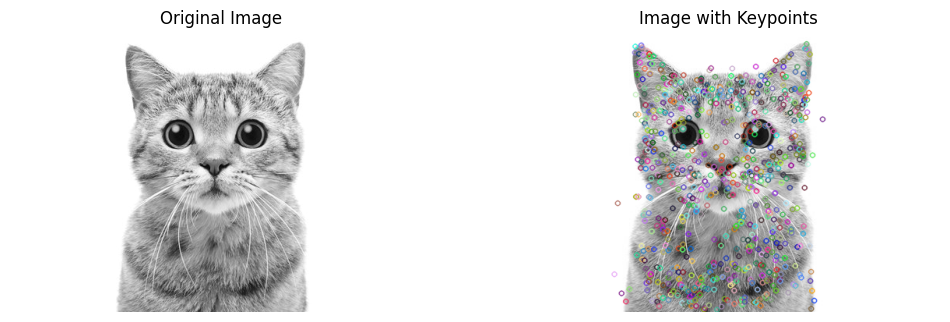

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Image with Keypoints')
plt.axis('off')

plt.show()
